In [1]:
import yoda
%matplotlib inline

import os
from yoda_helper import compare_yoda, compare_yoda_files
yoda.mplinit()

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
from collections import OrderedDict

In [2]:
print yoda.__version__

1.7.0


/REF/_EVTCOUNT not found


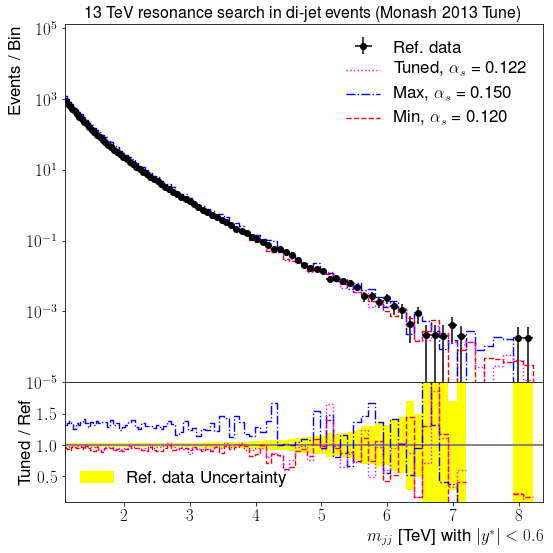

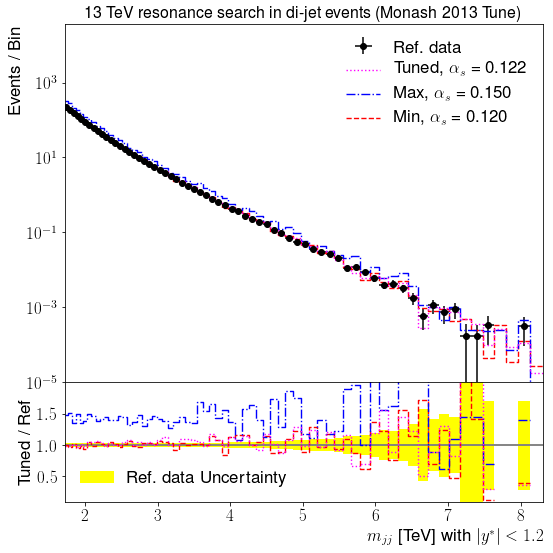

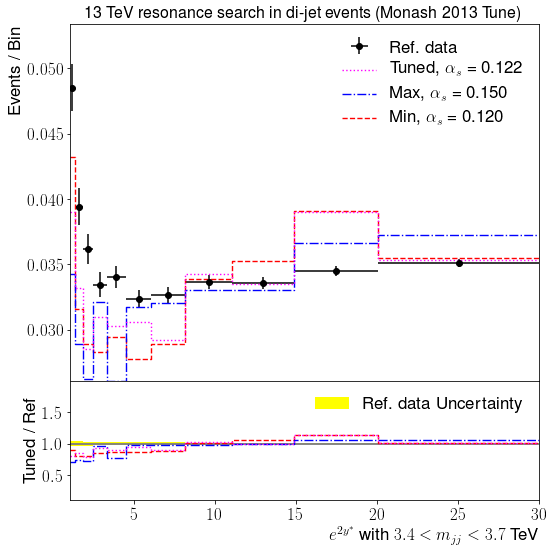

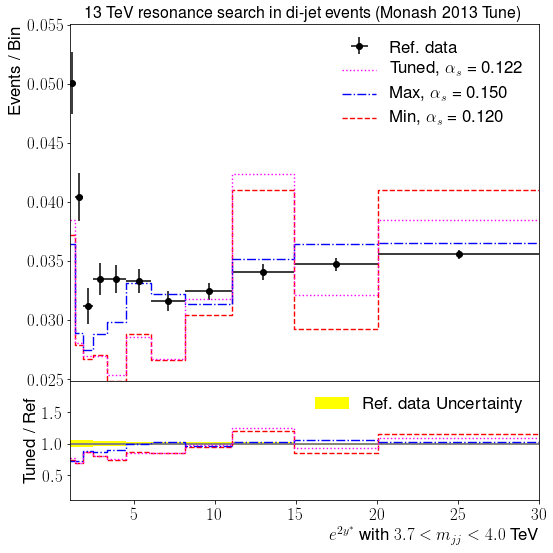

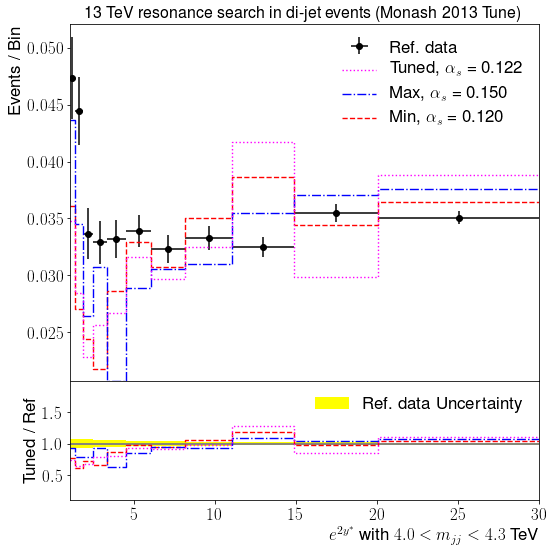

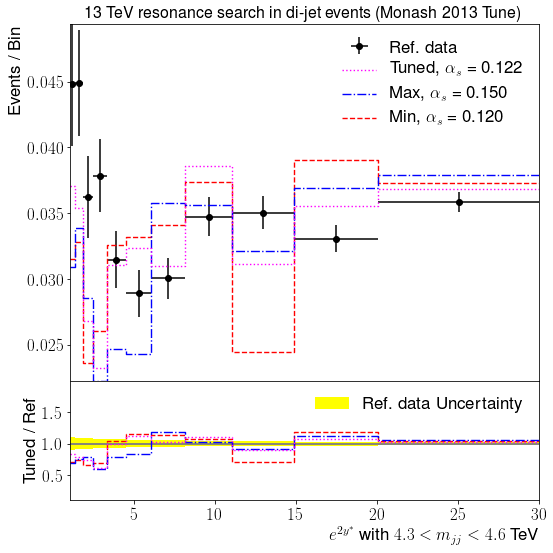

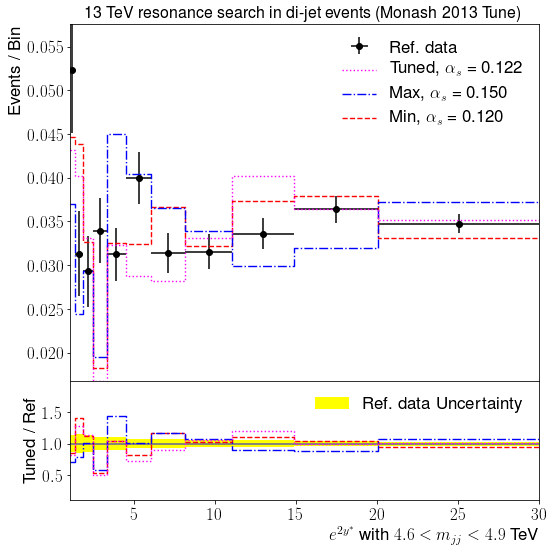

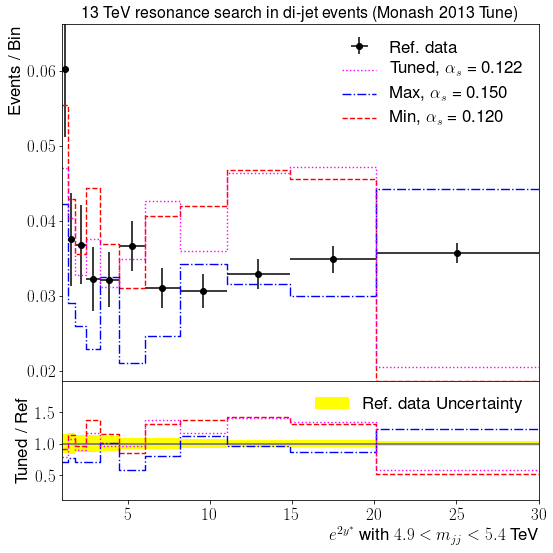

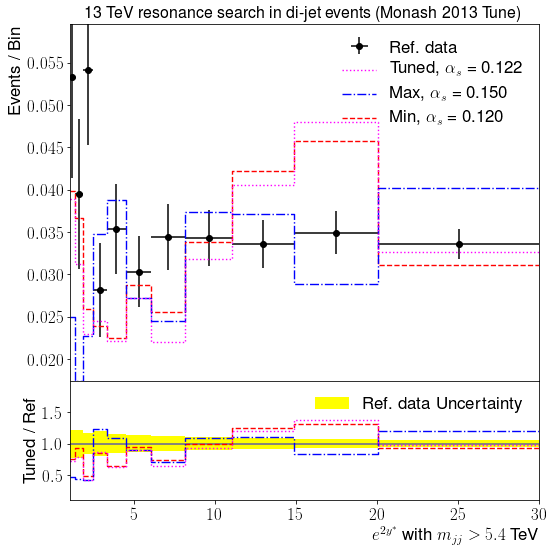

In [16]:
inputs = OrderedDict({
    "ref_file": "inputs/ATLAS_2017_I1519428/ATLAS_2017_I1519428.yoda",
    "tuned_dict_files": {
        r"Min, $\alpha_s$ = 0.120": "inputs/ATLAS_2017_I1519428/mc_tuneMonash_1mBiased_0p12.yoda",
        r"Tuned, $\alpha_s$ = 0.122": "inputs/ATLAS_2017_I1519428/ipolhisto_500k_smearedEvents.yoda",
        r"Max, $\alpha_s$ = 0.150": "inputs/ATLAS_2017_I1519428/mc_tuneMonash_1mBiased_0p15.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2017_I1519428/cmp_mc_monash", 
        'title': r'13 TeV resonance search in di-jet events (Monash 2013 Tune)',
        'errorbars': True,
        'd01-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 0.6$', True],
        'd02-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 1.2$', True],
        'd03-x01-y01': ['$e^{2y^*}$ with $3.4 < m_{jj} < 3.7$ TeV', False],
        'd04-x01-y01': ['$e^{2y^*}$ with $3.7 < m_{jj} < 4.0$ TeV', False],
        'd05-x01-y01': ['$e^{2y^*}$ with $4.0 < m_{jj} < 4.3$ TeV', False],
        'd06-x01-y01': ['$e^{2y^*}$ with $4.3 < m_{jj} < 4.6$ TeV', False],
        'd07-x01-y01': ['$e^{2y^*}$ with $4.6 < m_{jj} < 4.9$ TeV', False],
        'd08-x01-y01': ['$e^{2y^*}$ with $4.9 < m_{jj} < 5.4$ TeV', False],
        'd09-x01-y01': ['$e^{2y^*}$ with $m_{jj} > 5.4$ TeV', False]
    }
})
compare_yoda_files(**inputs)

In [4]:
data = yoda.read("inputs/ATLAS_2017_I1519428/mc.yoda")

In [ ]:
h = data['/ATLAS_2017_I1519428/d01-x01-y01']

In [ ]:
print "\n".join(type(h.bins[0]).__dict__.keys())

In [ ]:
type(h.bins[0]).__doc__

In [ ]:
ss = h.mkScatter()

In [ ]:
for p in ss.points:
    print p.x, p.y, p.xErrs, p.yErrs, p.sumW

In [ ]:
for b in h.bins:
    print b.xMin, b.xMax, b.height, b.sumW, b.area

In [ ]:
ATLAS_2014_I1268975_input = {
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        "Only R=0.4 jets": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_bias2sel_tuneWith0p4jets.yoda",
        "All observables": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_bias2sel.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975/cmp_all_vs_only0p4"
    }
}

In [ ]:
compare_yoda_files(**ATLAS_2014_I1268975_input)

In [ ]:
ATLAS_2014_I1268975_input = {
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        "Only R=0.6 jets": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_bias2sel_tuneWith0p6jets.yoda",
        "All observables": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_bias2sel.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975/cmp_all_vs_only0p6"
    }
}
compare_yoda_files(**ATLAS_2014_I1268975_input)

In [ ]:
inputs = {
    "ref_file": "inputs/ATLAS_2017_I1519428/ATLAS_2017_I1519428.yoda",
    "tuned_dict_files": {
        "alphaS=0.12, 4C": "inputs/ATLAS_2017_I1519428/mc_tune4C_1mBiased_0p12.yoda",
        "alphaS=0.12, Monash": "inputs/ATLAS_2017_I1519428/mc_tuneMonash_1mBiased_0p12.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2017_I1519428/cmp_mc"
    }
}
compare_yoda_files(**inputs)

In [ ]:
inputs = {
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        "alphaS=0.12, 4C": "inputs/ATLAS_2014_I1268975/mc_tune4C_500kBiased_0p12.yoda",
        "alphaS=0.12, Monash": "inputs/ATLAS_2014_I1268975/mc_tuneMonash_500kBiased_0p12.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975/cmp_mc"
    }
}
compare_yoda_files(**inputs)

In [ ]:
ATLAS_2014_I1268975_input = {
    "ref_file": "inputs/ATLAS_2017_I1519428/ATLAS_2017_I1519428.yoda",
    "tuned_dict_files": {
        "tuned": "inputs/ATLAS_2017_I1519428/ipolhisto_500k_smearedEvents.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2017_I1519428"
    }
}
compare_yoda_files(**ATLAS_2014_I1268975_input)

In [ ]:
ATLAS_2014_I1268975_input = {
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        #"5 Obs": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_r0p4_first5.yoda",
        #"All": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_allobservables.yoda",
        #"5 Obs with weights": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_r0p4_first5_diff_weights.yoda",
        "All 10m": "inputs/ATLAS_2014_I1268975/ipolhistos_10m_allobservables.yoda",
        "All 500k bias2sel": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_bias2sel.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975"
    }
}

In [ ]:
compare_yoda_files(**ATLAS_2014_I1268975_input)

In [ ]:
def to_be_deleted():
    h1 = tuned_5_obs_data['/ATLAS_2014_I1268975/d01-x01-y05']
    h2 = ref_data['/REF/ATLAS_2014_I1268975/d01-x01-y05']
    h2.setAnnotation("ratioref", True)
    yoda.plotting.mplinit(fontsize=14)
    print yoda.plotting.plot.__doc__

In [ ]:
def print_scater2D(h2d):
    for p in h2d.points:
        print p.x, p.y, p.xErrs, p.yErrAvg, p.errAvg(2)

In [ ]:
ATLAS_2017_I1519428_input = {
    "ref_file": "inputs/ATLAS_2017_I1519428/ATLAS_2017_I1519428.yoda",
    "tuned_dict_files": {
        "Origin": "inputs/ATLAS_2017_I1519428/ipol_out_of_box.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2017_I1519428"
    }
}

In [ ]:
compare_yoda_files(**ATLAS_2017_I1519428_input)

In [ ]:
inputs = OrderedDict({
    "ref_file": "inputs/ATLAS_2017_I1519428/ATLAS_2017_I1519428.yoda",
    "tuned_dict_files": {
        r"Min, $\alpha_s$=0.120": "inputs/ATLAS_2017_I1519428/mc_tuneMonash_1mBiased_0p12.yoda",
        r"Tuned, $\alpha_s$=0.122": "inputs/ATLAS_2017_I1519428/ipolhisto_500k_smearedEvents.yoda",
        r"Max, $\alpha_s$=0.150": "inputs/ATLAS_2017_I1519428/mc_tuneMonash_1mBiased_0p15.yoda",
    },
    "options": {
        'title': r'13 TeV resonance search in di-jet events (Monash 2013 Tune)',
        "output_dir": "output/ATLAS_2017_I1519428/cmp_mc_monash",
        'errorbars': True,
        'd01-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 0.6$', True],
        'd02-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 1.2$', True],
        'd03-x01-y01': ['$e^{2y^*}$ with $3.4 < m_{jj} < 3.7$ TeV', False],
        'd04-x01-y01': ['$e^{2y^*}$ with $3.7 < m_{jj} < 4.0$ TeV', False],
        'd05-x01-y01': ['$e^{2y^*}$ with $4.0 < m_{jj} < 4.3$ TeV', False],
        'd06-x01-y01': ['$e^{2y^*}$ with $4.3 < m_{jj} < 4.6$ TeV', False],
        'd07-x01-y01': ['$e^{2y^*}$ with $4.6 < m_{jj} < 4.9$ TeV', False],
        'd08-x01-y01': ['$e^{2y^*}$ with $4.9 < m_{jj} < 5.4$ TeV', False],
        'd09-x01-y01': ['$e^{2y^*}$ with $m_{jj} > 5.4$ TeV', False]
    }
})
compare_yoda_files(**inputs)

/REF/_EVTCOUNT not found


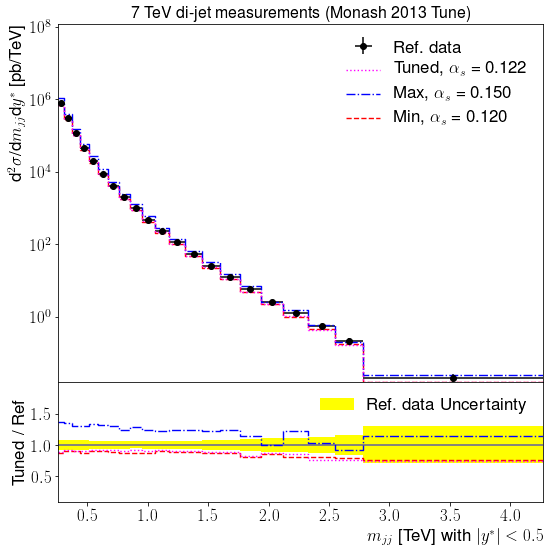

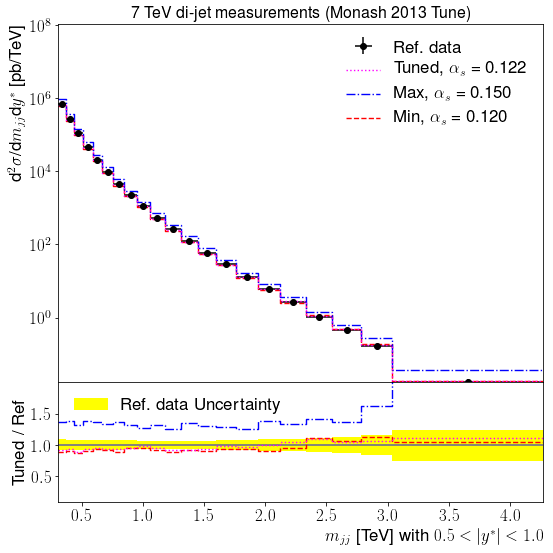

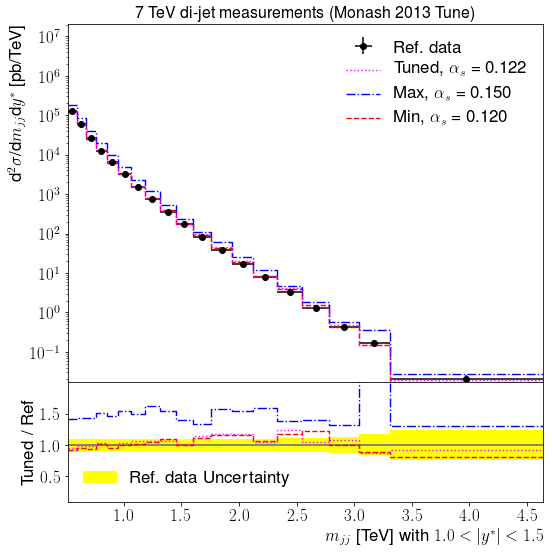

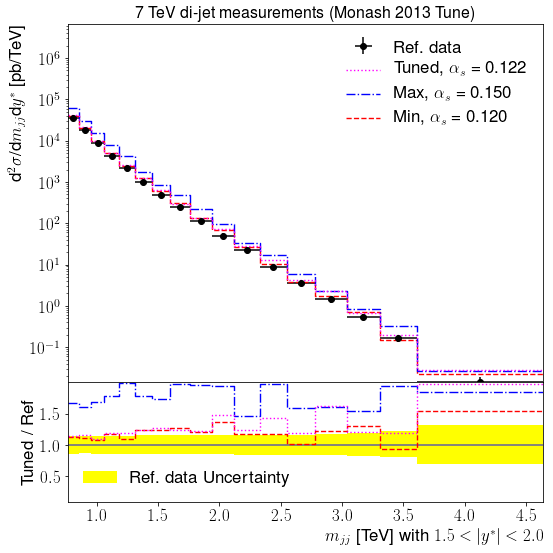

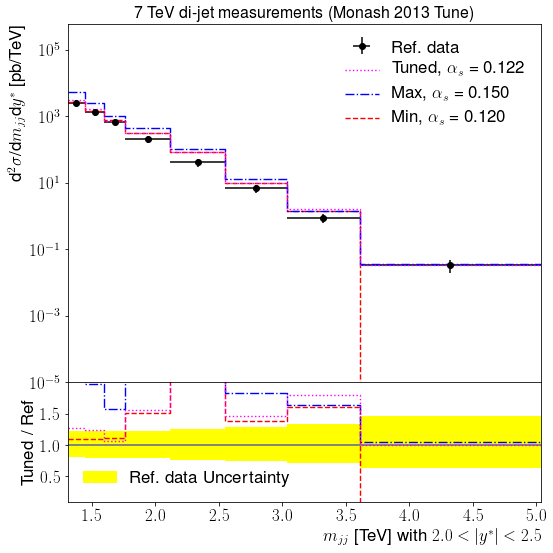

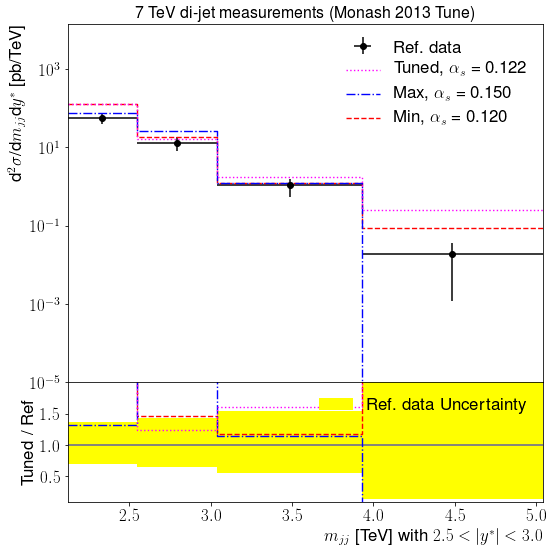

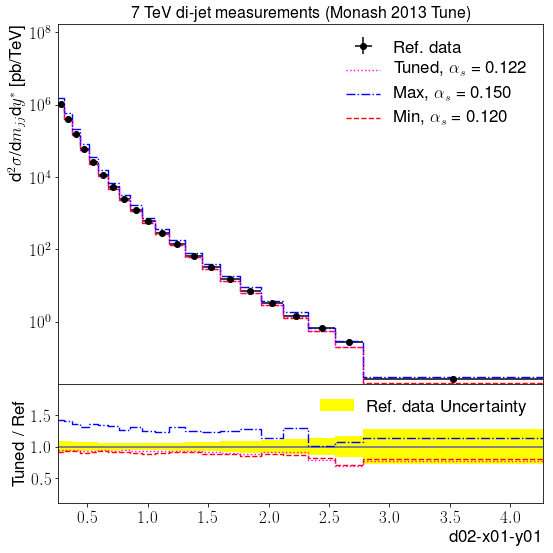

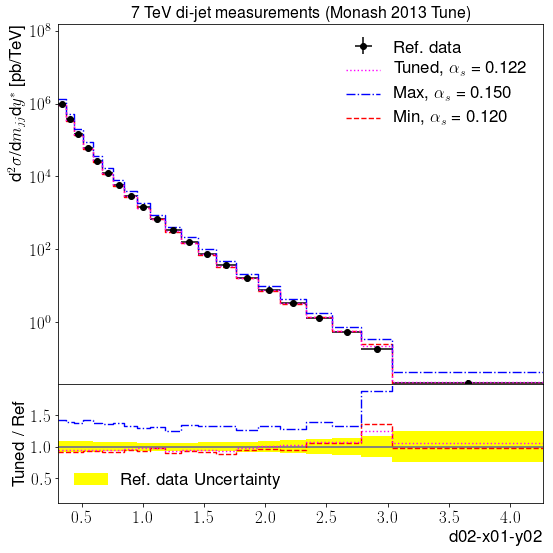

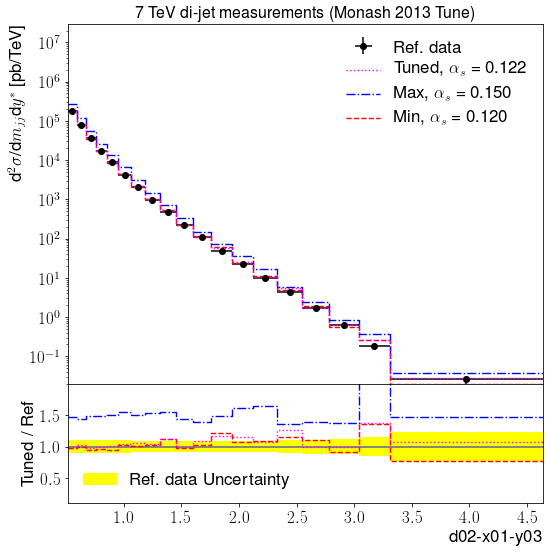

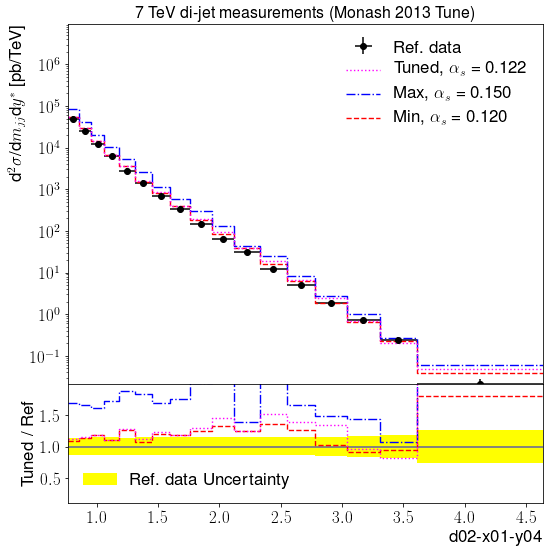

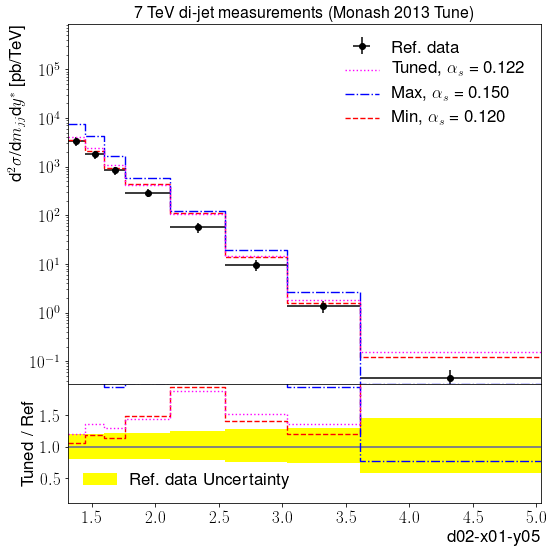

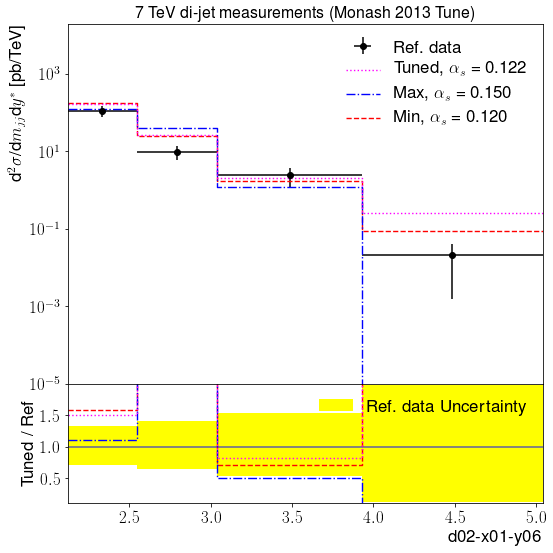

In [15]:
ATLAS_2014_I1268975_input = OrderedDict({
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        r"Min, $\alpha_s$ = 0.120": "inputs/ATLAS_2014_I1268975/mc_tuneMonash_500kBiased_0p12.yoda",
        r"Tuned, $\alpha_s$ = 0.122": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_bias2sel.yoda",
        r"Max, $\alpha_s$ = 0.150": "inputs/ATLAS_2014_I1268975/mc_tuneMonash_500kBiased_0p15.yoda"
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975/mc_cmp_monash",
        'title': r'7 TeV di-jet measurements (Monash 2013 Tune)',
        'errorbars': True,
        'ylabel': "d$^2\sigma$/d$m_{jj}$d$y^*$ [pb/TeV]",
        'd01-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 0.5$', True],
        'd01-x01-y02': ['$m_{jj}$ [TeV] with $0.5 < |y^*| < 1.0$', True],
        'd01-x01-y03': ['$m_{jj}$ [TeV] with $1.0 < |y^*| < 1.5$', True],
        'd01-x01-y04': ['$m_{jj}$ [TeV] with $1.5 < |y^*| < 2.0$', True],
        'd01-x01-y05': ['$m_{jj}$ [TeV] with $2.0 < |y^*| < 2.5$', True],
        'd01-x01-y06': ['$m_{jj}$ [TeV] with $2.5 < |y^*| < 3.0$', True]
    }
})
compare_yoda_files(**ATLAS_2014_I1268975_input)

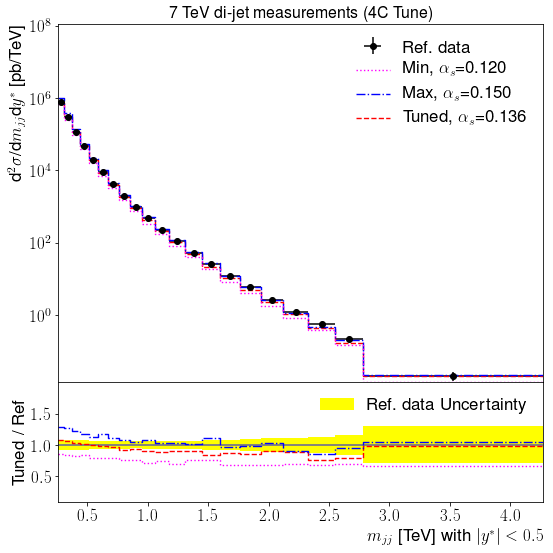

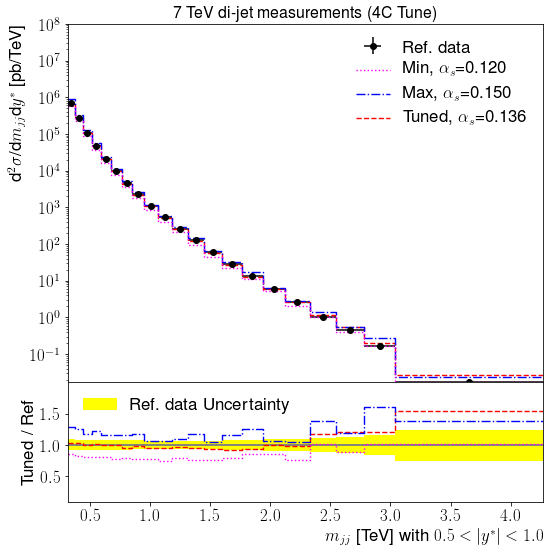

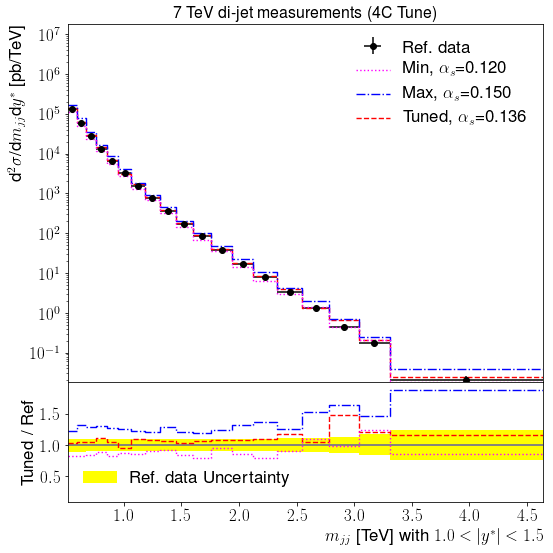

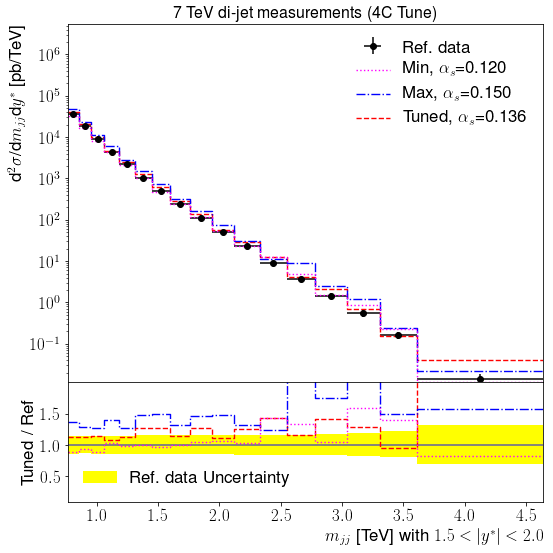

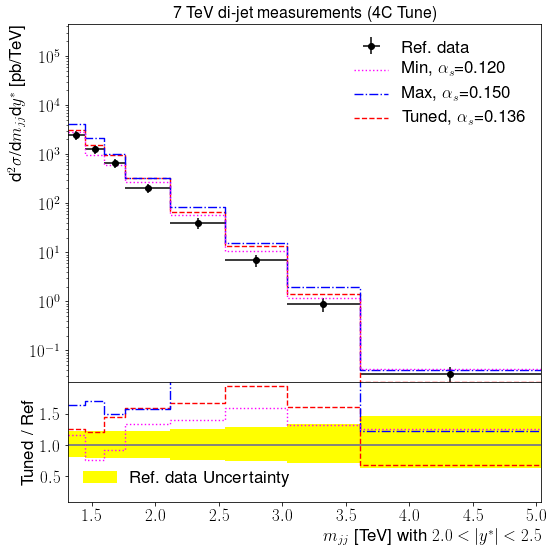

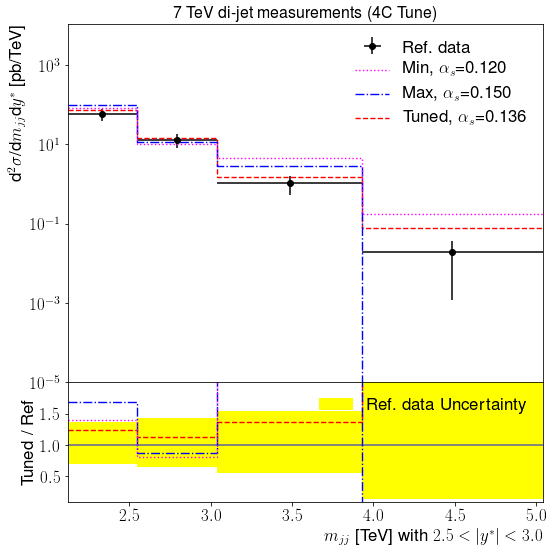

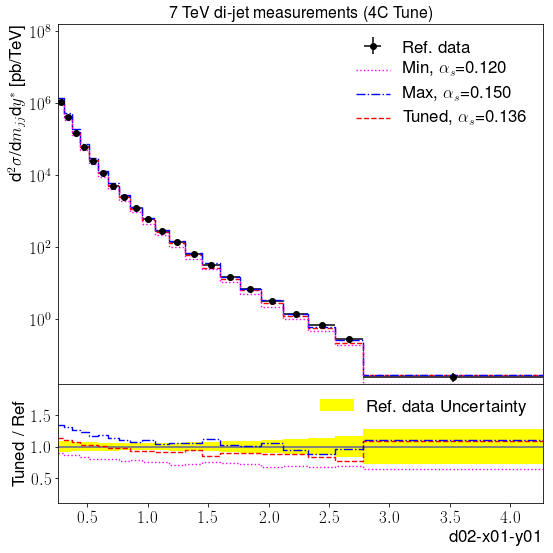

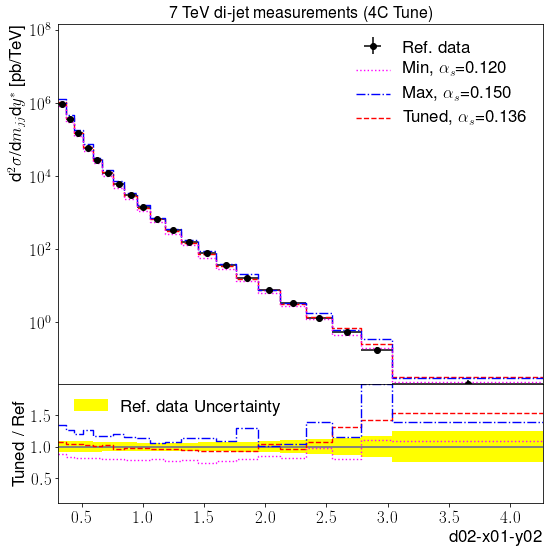

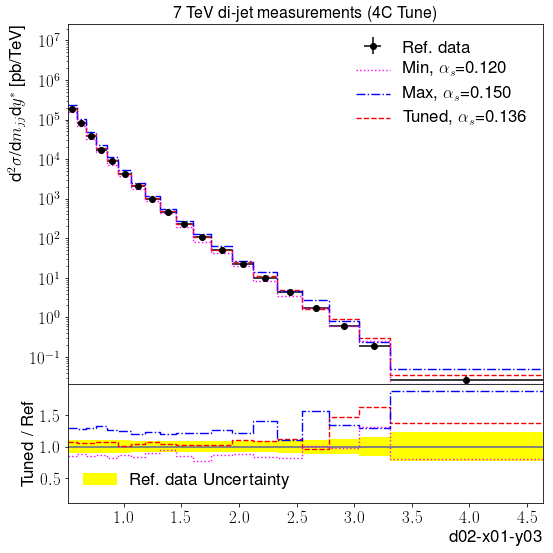

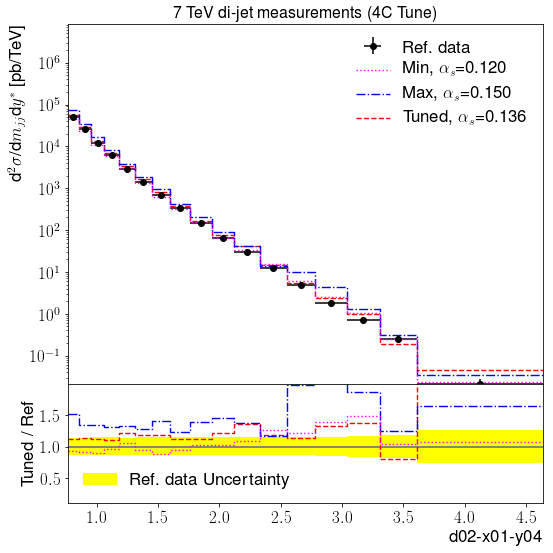

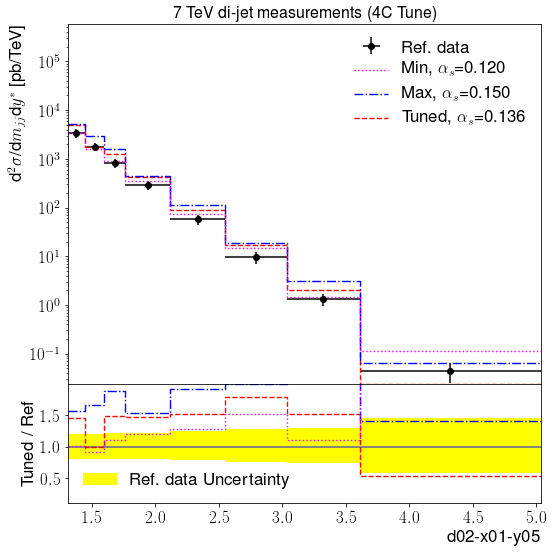

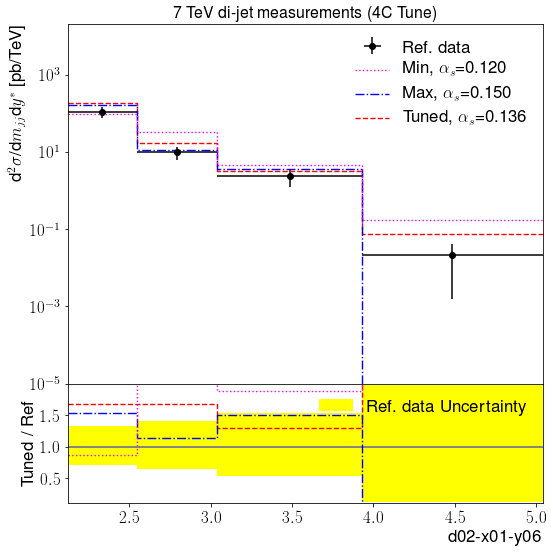

In [13]:
ATLAS_2014_I1268975_input = OrderedDict({
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        r"Min, $\alpha_s$ = 0.120": "inputs/ATLAS_2014_I1268975/mc_tune4C_500kBiased_0p12.yoda",
        r"Tuned, $\alpha_s$ = 0.136": "inputs/ATLAS_2014_I1268975/ipolhistos_tune4C_500kbias2sel.yoda",
        r"Max, $\alpha_s$ = 0.150": "inputs/ATLAS_2014_I1268975/mc_tune4C_500kBiased_0p15.yoda"
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975/mc_cmp_4C",
        'title': r'7 TeV di-jet measurements (4C Tune)',
        'errorbars': True,
        'ylabel': "d$^2\sigma$/d$m_{jj}$d$y^*$ [pb/TeV]",
        'd01-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 0.5$', True],
        'd01-x01-y02': ['$m_{jj}$ [TeV] with $0.5 < |y^*| < 1.0$', True],
        'd01-x01-y03': ['$m_{jj}$ [TeV] with $1.0 < |y^*| < 1.5$', True],
        'd01-x01-y04': ['$m_{jj}$ [TeV] with $1.5 < |y^*| < 2.0$', True],
        'd01-x01-y05': ['$m_{jj}$ [TeV] with $2.0 < |y^*| < 2.5$', True],
        'd01-x01-y06': ['$m_{jj}$ [TeV] with $2.5 < |y^*| < 3.0$', True]
    }
})
compare_yoda_files(**ATLAS_2014_I1268975_input)

/REF/_EVTCOUNT not found


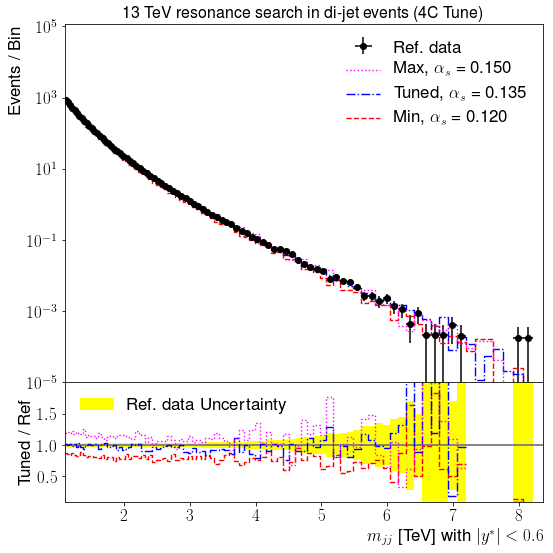

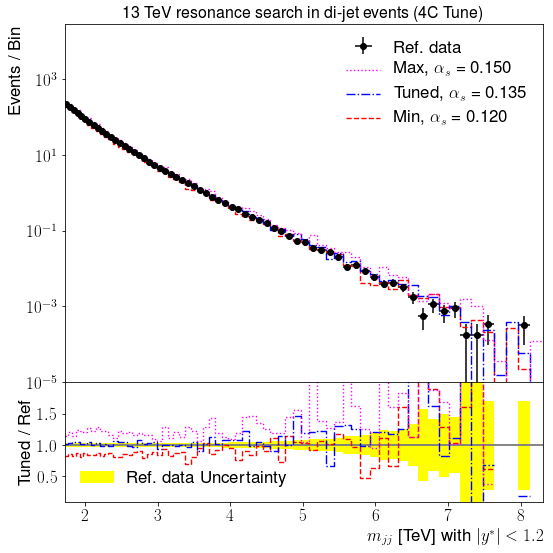

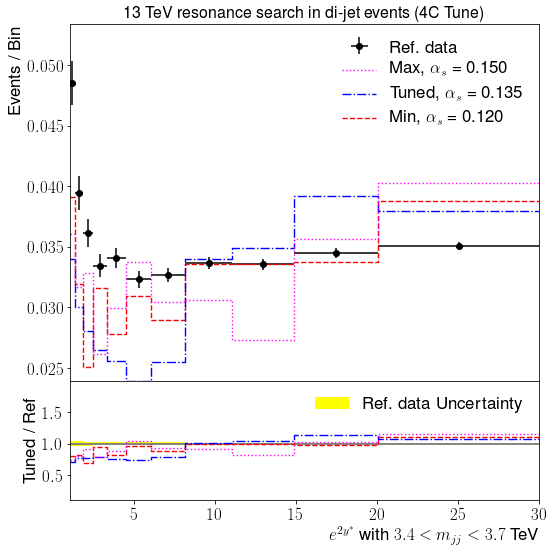

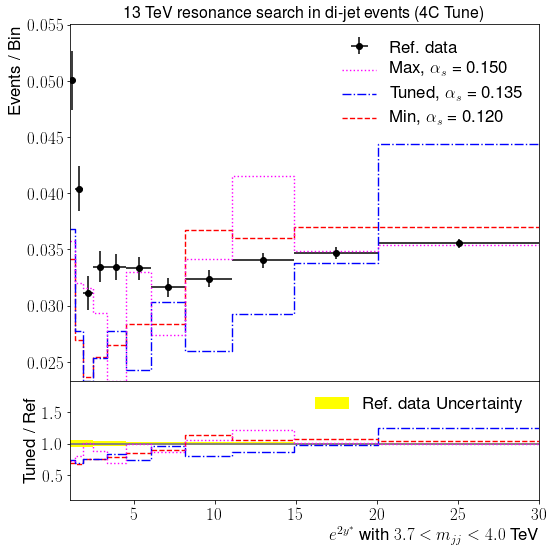

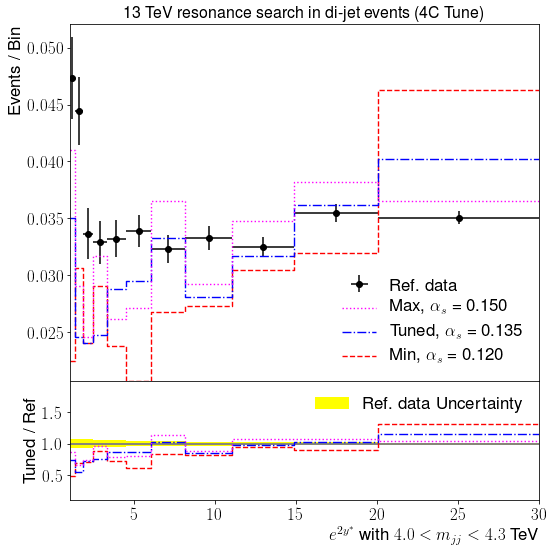

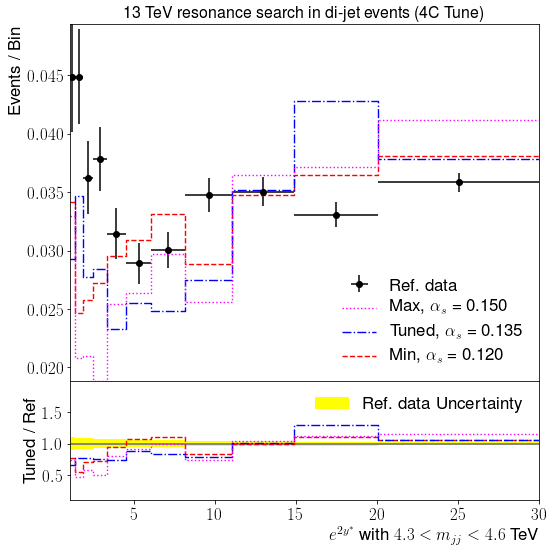

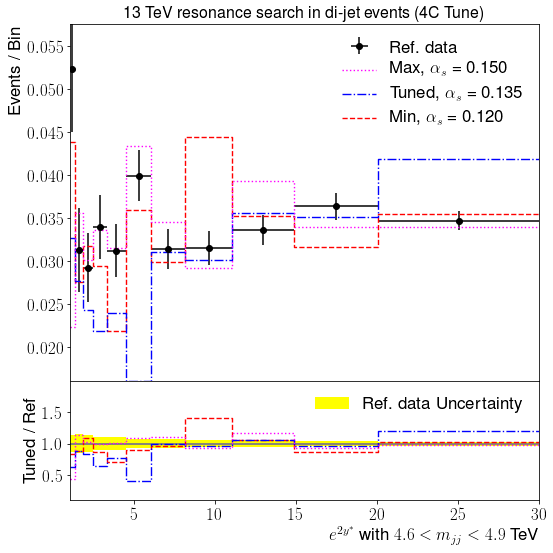

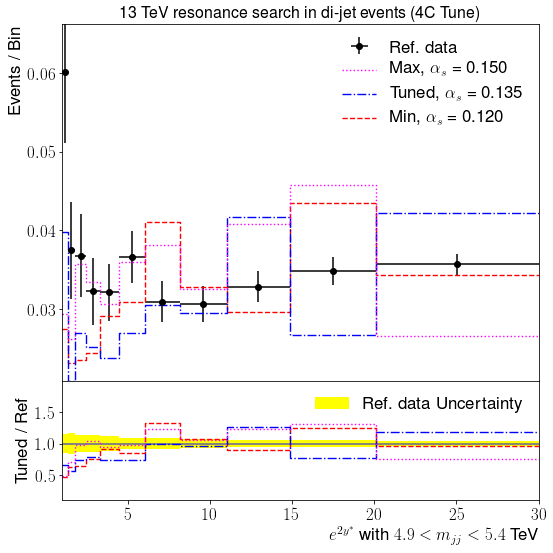

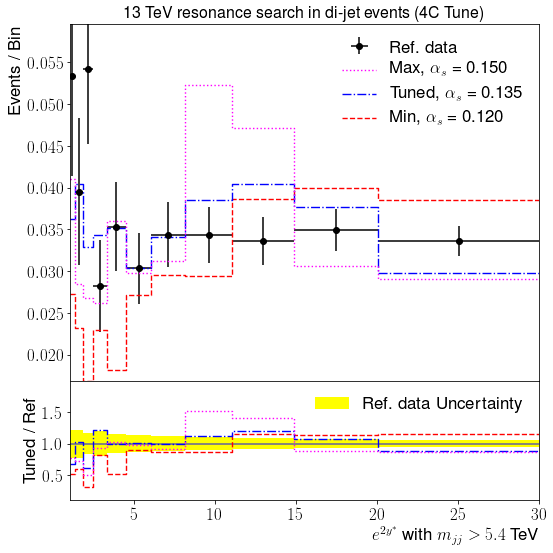

In [14]:
inputs = OrderedDict({
    "ref_file": "inputs/ATLAS_2017_I1519428/ATLAS_2017_I1519428.yoda",
    "tuned_dict_files": {
        r"Min, $\alpha_s$ = 0.120": "inputs/ATLAS_2017_I1519428/mc_tune4C_1mBiased_0p12.yoda",
        r"Tuned, $\alpha_s$ = 0.135": "inputs/ATLAS_2017_I1519428/ipolhisto_tune4C_500k_smearedEvents.yoda",
        r"Max, $\alpha_s$ = 0.150": "inputs/ATLAS_2017_I1519428/mc_tune4C_1mBiased_0p15.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2017_I1519428/cmp_mc_tun4C",
        'title': r'13 TeV resonance search in di-jet events (4C Tune)',
        'errorbars': True,
        'd01-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 0.6$', True],
        'd02-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 1.2$', True],
        'd03-x01-y01': ['$e^{2y^*}$ with $3.4 < m_{jj} < 3.7$ TeV', False],
        'd04-x01-y01': ['$e^{2y^*}$ with $3.7 < m_{jj} < 4.0$ TeV', False],
        'd05-x01-y01': ['$e^{2y^*}$ with $4.0 < m_{jj} < 4.3$ TeV', False],
        'd06-x01-y01': ['$e^{2y^*}$ with $4.3 < m_{jj} < 4.6$ TeV', False],
        'd07-x01-y01': ['$e^{2y^*}$ with $4.6 < m_{jj} < 4.9$ TeV', False],
        'd08-x01-y01': ['$e^{2y^*}$ with $4.9 < m_{jj} < 5.4$ TeV', False],
        'd09-x01-y01': ['$e^{2y^*}$ with $m_{jj} > 5.4$ TeV', False]
    }
})
compare_yoda_files(**inputs)

/REF/_EVTCOUNT not found


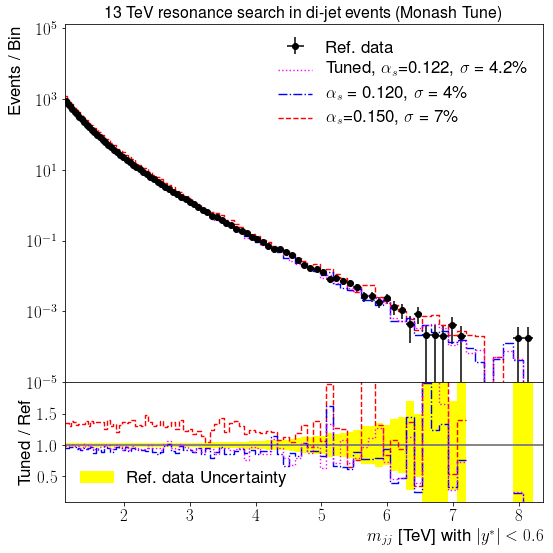

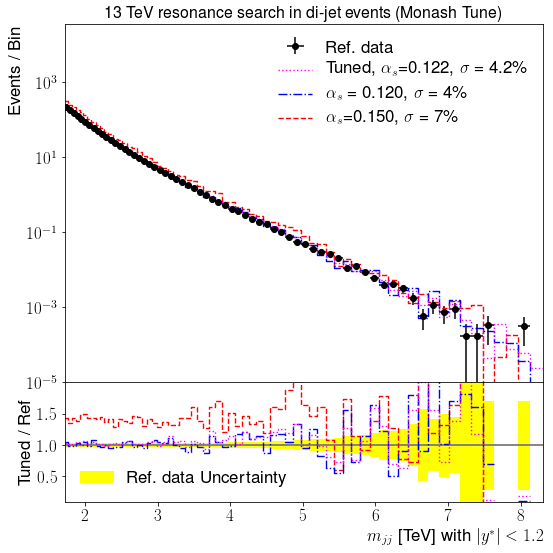

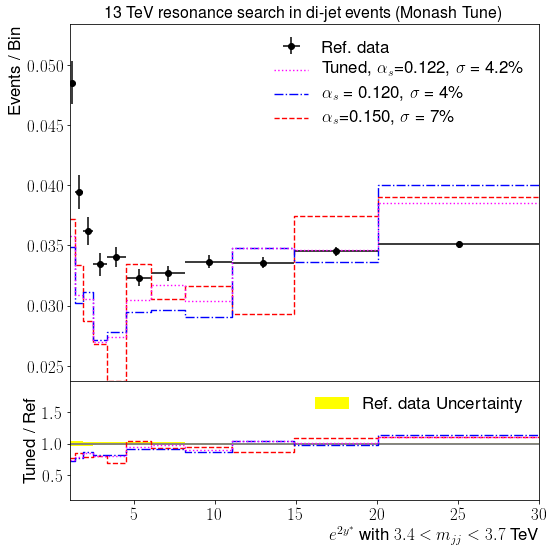

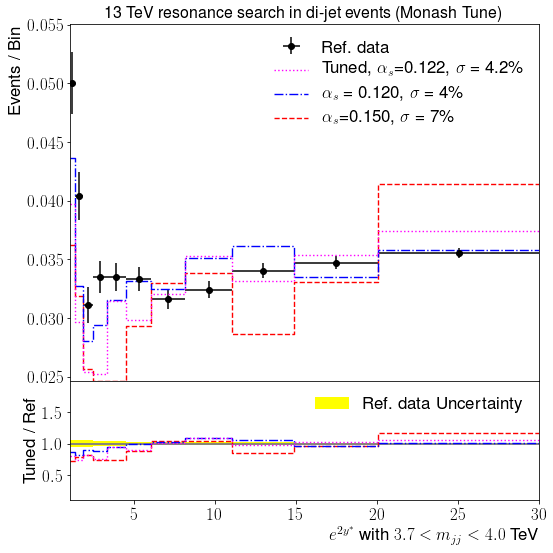

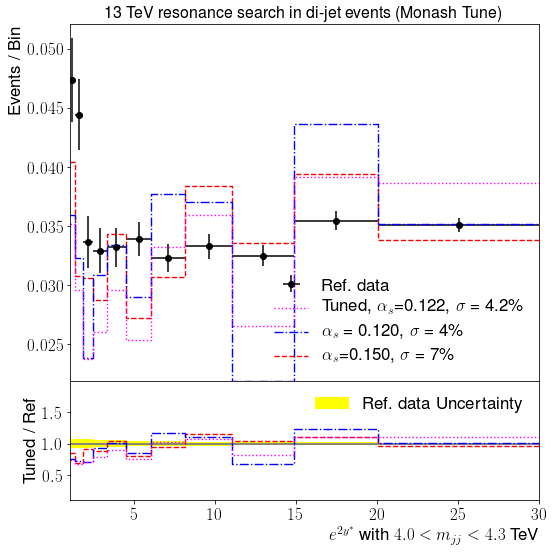

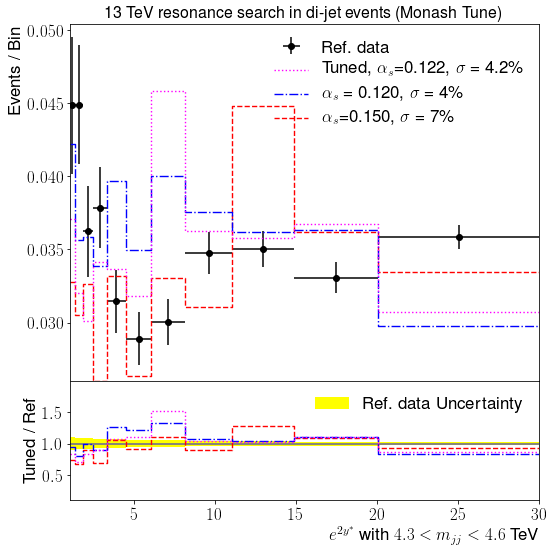

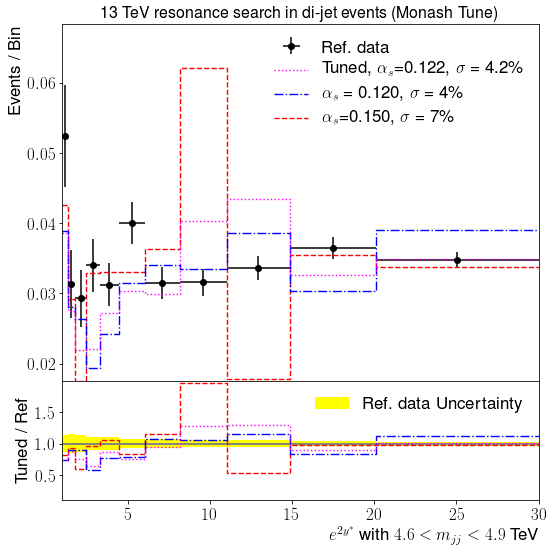

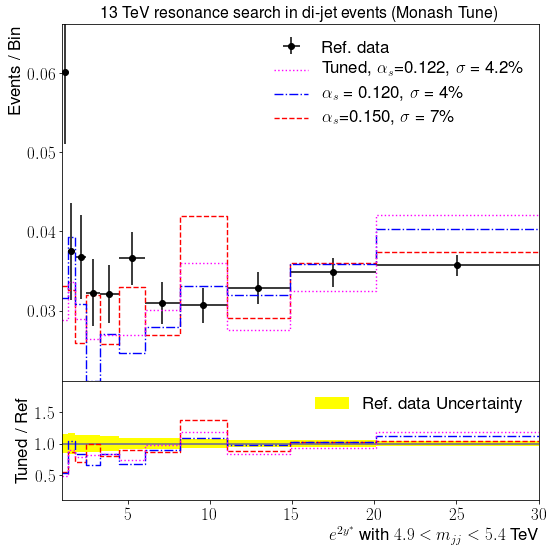

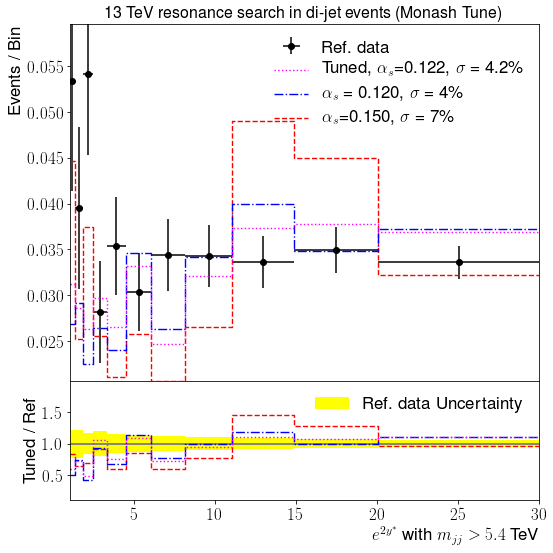

In [21]:
inputs_detector = OrderedDict({
    "ref_file": "inputs/ATLAS_2017_I1519428/ATLAS_2017_I1519428.yoda",
    "tuned_dict_files": {
        r"$\alpha_s$ = 0.120, $\sigma$ = 4\%": "inputs/ATLAS_2017_I1519428_detectorInfo/mc_monash_1mBiased_0p12_4p.yoda",
        r"Tuned, $\alpha_s$=0.122, $\sigma$ = 4.2\%": "inputs/ATLAS_2017_I1519428_detectorInfo/ipolhisto_monash_1mBias_smearedEvents.yoda",
        r"$\alpha_s$=0.150, $\sigma$ = 7\%": "inputs/ATLAS_2017_I1519428_detectorInfo/mc_monash_1mBiased_0p15_5p.yoda",
    },
    "options": {
        "output_dir": "output/ATLAS_2017_I1519428/cmp_mc_monash_det",
        'title': r'13 TeV resonance search in di-jet events (Monash Tune)',
        'errorbars': True,
        'd01-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 0.6$', True],
        'd02-x01-y01': ['$m_{jj}$ [TeV] with $|y^*| < 1.2$', True],
        'd03-x01-y01': ['$e^{2y^*}$ with $3.4 < m_{jj} < 3.7$ TeV', False],
        'd04-x01-y01': ['$e^{2y^*}$ with $3.7 < m_{jj} < 4.0$ TeV', False],
        'd05-x01-y01': ['$e^{2y^*}$ with $4.0 < m_{jj} < 4.3$ TeV', False],
        'd06-x01-y01': ['$e^{2y^*}$ with $4.3 < m_{jj} < 4.6$ TeV', False],
        'd07-x01-y01': ['$e^{2y^*}$ with $4.6 < m_{jj} < 4.9$ TeV', False],
        'd08-x01-y01': ['$e^{2y^*}$ with $4.9 < m_{jj} < 5.4$ TeV', False],
        'd09-x01-y01': ['$e^{2y^*}$ with $m_{jj} > 5.4$ TeV', False]
    }
})
compare_yoda_files(**inputs_detector)

In [ ]:
inputs = {
    "ref_file": "inputs/ATLAS_2017_I1519428/ATLAS_2017_I1519428.yoda",
    "tuned_dict_files": {
        "Default": "inputs/ATLAS_2017_I1519428/ipolhisto_500k_smearedEvents.yoda",
        "Portfolio": "inputs/ATLAS_2017_I1519428/ipolhisto_500k_smearedEvents_Portfolio.yoda"
    },
    "options": {
        "output_dir": "output/ATLAS_2017_I1519428/cmp_portfolio"
    }
}
compare_yoda_files(**inputs)

In [ ]:
ATLAS_2014_I1268975_input = {
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        "Default": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_bias2sel.yoda",
        "Portfolio": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_bias2sel_portfolio.yoda"
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975/cmp_portfolio"
    }
}
compare_yoda_files(**ATLAS_2014_I1268975_input)

In [ ]:
ATLAS_2014_I1268975_input = {
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        "Default": "inputs/ATLAS_2014_I1268975/ipolhistos_tune4C_500kbias2sel.yoda",
        "Portfolio": "inputs/ATLAS_2014_I1268975/ipolhistos_tune4C_500kbias2sel_portfolio.yoda"
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975/cmp_portfolio_tune4C"
    }
}
compare_yoda_files(**ATLAS_2014_I1268975_input)

In [ ]:
print u"^[[?1034h"